In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_columns', None)
#Removing the scientific notation
pd.options.display.float_format = '{:.4f}'.format
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy import stats
import statsmodels.api as sm
from scipy.special import inv_boxcox
from scipy.stats import boxcox
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import combinations 

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime
import pickle

# Imports for data visualization
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from matplotlib.dates import DateFormatter
from matplotlib import dates as mpld
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse as root

#Import of Prophet Library
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy import stats
import statsmodels.api as sm
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

register_matplotlib_converters()

In [5]:
#Data Cleaning
df = pd.read_excel('./monthly_index.xls')
df.head(2)

,COMM_NAME,COMM_CODE,COMM_WT,INDX042012,INDX052012,INDX062012,INDX072012,INDX082012,INDX092012,INDX102012,INDX112012,INDX122012,INDX012013,INDX022013,INDX032013,INDX042013,INDX052013,INDX062013,INDX072013,INDX082013,INDX092013,INDX102013,INDX112013,INDX122013,INDX012014,INDX022014,INDX032014,INDX042014,INDX052014,INDX062014,INDX072014,INDX082014,INDX092014,INDX102014,INDX112014,INDX122014,INDX012015,INDX022015,INDX032015,INDX042015,INDX052015,INDX062015,INDX072015,INDX082015,INDX092015,INDX102015,INDX112015,INDX122015,INDX012016,INDX022016,INDX032016,INDX042016,INDX052016,INDX062016,INDX072016,INDX082016,INDX092016,INDX102016,INDX112016,INDX122016,INDX012017,INDX022017,INDX032017,INDX042017,INDX052017,INDX062017,INDX072017,INDX082017,INDX092017,INDX102017,INDX112017,INDX122017,INDX012018,INDX022018,INDX032018,INDX042018,INDX052018,INDX062018,INDX072018,INDX082018,INDX092018,INDX102018,INDX112018,INDX122018,INDX012019,INDX022019,INDX032019,INDX042019,INDX052019,INDX062019,INDX072019,INDX082019,INDX092019,INDX102019,INDX112019,INDX122019,INDX012020,INDX022020,INDX032020,INDX042020,INDX052020,INDX062020,INDX072020,INDX082020,INDX092020,INDX102020,INDX112020,INDX122020
0,All commodities,1000000000,100.0000,104.7000,105.3000,105.3000,106.2000,106.9000,107.6000,107.4000,107.3000,107.1000,108.0000,108.4000,108.6000,108.6000,108.6000,110.1000,111.2000,112.9000,114.3000,114.6000,114.3000,113.4000,113.6000,113.6000,114.3000,114.1000,114.8000,115.2000,116.7000,117.2000,116.4000,115.6000,114.1000,112.1000,110.8000,109.6000,109.9000,110.2000,111.4000,111.8000,111.1000,110.0000,109.9000,110.1000,109.9000,109.4000,108.0000,107.1000,107.7000,109.0000,110.4000,111.7000,111.8000,111.2000,111.4000,111.5000,111.9000,111.7000,112.6000,113.0000,113.2000,113.2000,112.9000,112.7000,113.9000,114.8000,114.9000,115.6000,116.4000,115.7000,116.0000,116.1000,116.3000,117.3000,118.3000,119.1000,119.9000,120.1000,120.9000,122.0000,121.6000,119.7000,119.2000,119.5000,119.9000,121.1000,121.6000,121.5000,121.3000,121.5000,121.3000,122.0000,122.3000,123.0000,123.4000,122.2000,120.4000,119.2000,117.5000,119.3000,121.0000,122.0000,122.9000,123.6000,124.2000,124.5000
1,I PRIMARY ARTICLES,1100000000,22.6176,107.1000,107.5000,107.9000,111.4000,112.7000,112.0000,111.0000,112.2000,111.9000,113.8000,115.2000,114.6000,114.6000,116.8000,120.5000,121.7000,125.6000,126.0000,128.4000,128.4000,123.3000,121.2000,121.1000,121.4000,121.5000,124.0000,125.7000,130.1000,131.5000,129.4000,127.3000,126.5000,123.1000,120.8000,120.7000,120.1000,121.5000,123.4000,124.9000,124.3000,125.4000,125.9000,126.4000,127.1000,126.7000,124.3000,122.1000,123.0000,126.1000,128.8000,132.0000,131.8000,131.4000,130.6000,129.1000,128.8000,126.8000,126.7000,127.0000,127.1000,127.4000,126.6000,126.5000,132.6000,135.3000,131.5000,133.9000,136.0000,131.7000,129.9000,128.0000,128.2000,130.7000,131.4000,132.5000,135.3000,135.2000,135.5000,137.2000,136.8000,133.5000,133.8000,134.1000,134.5000,139.3000,140.3000,141.0000,142.8000,144.0000,143.0000,145.5000,147.2000,148.9000,147.2000,142.8000,137.4000,137.8000,137.3000,140.9000,145.1000,146.7000,148.8000,151.8000,151.2000,146.5000


In [6]:
to_forecast  = ['Aluminium metal','Personal Computer (P.C.)','Air Coolers','Diesel/Electric locomotive','Plastic components']
product_forecast_commodity = to_forecast[0]
comm1 = df[df['COMM_NAME']==to_forecast[0]]
comm1.head(3)

,COMM_NAME,COMM_CODE,COMM_WT,INDX042012,INDX052012,INDX062012,INDX072012,INDX082012,INDX092012,INDX102012,INDX112012,INDX122012,INDX012013,INDX022013,INDX032013,INDX042013,INDX052013,INDX062013,INDX072013,INDX082013,INDX092013,INDX102013,INDX112013,INDX122013,INDX012014,INDX022014,INDX032014,INDX042014,INDX052014,INDX062014,INDX072014,INDX082014,INDX092014,INDX102014,INDX112014,INDX122014,INDX012015,INDX022015,INDX032015,INDX042015,INDX052015,INDX062015,INDX072015,INDX082015,INDX092015,INDX102015,INDX112015,INDX122015,INDX012016,INDX022016,INDX032016,INDX042016,INDX052016,INDX062016,INDX072016,INDX082016,INDX092016,INDX102016,INDX112016,INDX122016,INDX012017,INDX022017,INDX032017,INDX042017,INDX052017,INDX062017,INDX072017,INDX082017,INDX092017,INDX102017,INDX112017,INDX122017,INDX012018,INDX022018,INDX032018,INDX042018,INDX052018,INDX062018,INDX072018,INDX082018,INDX092018,INDX102018,INDX112018,INDX122018,INDX012019,INDX022019,INDX032019,INDX042019,INDX052019,INDX062019,INDX072019,INDX082019,INDX092019,INDX102019,INDX112019,INDX122019,INDX012020,INDX022020,INDX032020,INDX042020,INDX052020,INDX062020,INDX072020,INDX082020,INDX092020,INDX102020,INDX112020,INDX122020
362,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,1310000000,6.4650,105.6000,106.8000,107.4000,107.8000,108.5000,108.7000,108.5000,108.6000,108.9000,109.4000,109.5000,109.8000,110.1000,110.0000,110.9000,112.1000,112.8000,114.3000,114.3000,114.3000,114.7000,114.8000,115.4000,116.2000,116.4000,116.6000,116.8000,117.2000,117.6000,118.1000,117.4000,117.2000,115.1000,113.9000,113.0000,113.8000,113.9000,114.6000,114.5000,114.2000,113.4000,113.0000,112.6000,111.9000,111.1000,110.8000,110.6000,110.9000,111.5000,111.7000,111.3000,111.7000,110.7000,110.3000,110.3000,110.5000,110.2000,110.7000,111.3000,111.7000,111.6000,111.7000,111.5000,111.1000,111.1000,111.3000,111.9000,112.4000,113.2000,114.1000,115.1000,115.5000,116.3000,117.4000,117.6000,118.3000,118.8000,119.6000,120.5000,121.2000,120.0000,119.6000,119.7000,119.6000,119.9000,119.8000,119.0000,118.4000,118.2000,117.7000,117.1000,116.5000,116.2000,116.2000,115.8000,115.5000,115.2000,115.5000,115.7000,115.9000,116.1000,116.1000,116.8000,117.7000,119.3000


In [7]:
#Dropping the Column
comm1.drop(['COMM_CODE','COMM_WT'],inplace=True, axis = 1)
comm1.head(5)

c:\users\admin\.conda\envs\analyst\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,COMM_NAME,INDX042012,INDX052012,INDX062012,INDX072012,INDX082012,INDX092012,INDX102012,INDX112012,INDX122012,INDX012013,INDX022013,INDX032013,INDX042013,INDX052013,INDX062013,INDX072013,INDX082013,INDX092013,INDX102013,INDX112013,INDX122013,INDX012014,INDX022014,INDX032014,INDX042014,INDX052014,INDX062014,INDX072014,INDX082014,INDX092014,INDX102014,INDX112014,INDX122014,INDX012015,INDX022015,INDX032015,INDX042015,INDX052015,INDX062015,INDX072015,INDX082015,INDX092015,INDX102015,INDX112015,INDX122015,INDX012016,INDX022016,INDX032016,INDX042016,INDX052016,INDX062016,INDX072016,INDX082016,INDX092016,INDX102016,INDX112016,INDX122016,INDX012017,INDX022017,INDX032017,INDX042017,INDX052017,INDX062017,INDX072017,INDX082017,INDX092017,INDX102017,INDX112017,INDX122017,INDX012018,INDX022018,INDX032018,INDX042018,INDX052018,INDX062018,INDX072018,INDX082018,INDX092018,INDX102018,INDX112018,INDX122018,INDX012019,INDX022019,INDX032019,INDX042019,INDX052019,INDX062019,INDX072019,INDX082019,INDX092019,INDX102019,INDX112019,INDX122019,INDX012020,INDX022020,INDX032020,INDX042020,INDX052020,INDX062020,INDX072020,INDX082020,INDX092020,INDX102020,INDX112020,INDX122020
362,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,105.6000,106.8000,107.4000,107.8000,108.5000,108.7000,108.5000,108.6000,108.9000,109.4000,109.5000,109.8000,110.1000,110.0000,110.9000,112.1000,112.8000,114.3000,114.3000,114.3000,114.7000,114.8000,115.4000,116.2000,116.4000,116.6000,116.8000,117.2000,117.6000,118.1000,117.4000,117.2000,115.1000,113.9000,113.0000,113.8000,113.9000,114.6000,114.5000,114.2000,113.4000,113.0000,112.6000,111.9000,111.1000,110.8000,110.6000,110.9000,111.5000,111.7000,111.3000,111.7000,110.7000,110.3000,110.3000,110.5000,110.2000,110.7000,111.3000,111.7000,111.6000,111.7000,111.5000,111.1000,111.1000,111.3000,111.9000,112.4000,113.2000,114.1000,115.1000,115.5000,116.3000,117.4000,117.6000,118.3000,118.8000,119.6000,120.5000,121.2000,120.0000,119.6000,119.7000,119.6000,119.9000,119.8000,119.0000,118.4000,118.2000,117.7000,117.1000,116.5000,116.2000,116.2000,115.8000,115.5000,115.2000,115.5000,115.7000,115.9000,116.1000,116.1000,116.8000,117.7000,119.3000


In [22]:
reshaped_df = comm1.melt(id_vars=['COMM_NAME'],var_name='Month-Year',value_name='WPI')
reshaped_df.head(10)

,COMM_NAME,Month-Year,WPI
0,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,INDX042012,105.6000
1,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,INDX052012,106.8000
2,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,INDX062012,107.4000
3,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,INDX072012,107.8000
4,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,INDX082012,108.5000
5,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,INDX092012,108.7000
6,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,INDX102012,108.5000
7,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,INDX112012,108.6000
8,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,INDX122012,108.9000
9,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,INDX012013,109.4000


In [23]:
reshaped_df['Month-Year'] = reshaped_df['Month-Year'].str.replace('INDX', '')
reshaped_df.head(2)
reshaped_df.tail(2)
reshaped_df

,COMM_NAME,Month-Year,WPI
0,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,042012,105.6000
1,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,052012,106.8000


,COMM_NAME,Month-Year,WPI
103,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,112020,117.7000
104,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,122020,119.3000


,COMM_NAME,Month-Year,WPI
0,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,042012,105.6000
1,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,052012,106.8000
2,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,062012,107.4000
3,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,072012,107.8000
4,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,082012,108.5000
...,...,...,...
100,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,082020,116.1000
101,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,092020,116.1000
102,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,102020,116.8000
103,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,112020,117.7000


In [25]:
time_series = pd.date_range(start='04/30/2012', end='12/31/2020', freq='M')
duration = pd.DataFrame(data={"TimeSeries":time_series},index=time_series)
duration.head(5)
duration.tail(5)
reshaped_df['TimeSeries'] = duration.index

reshaped_df.index=reshaped_df['TimeSeries'] 
#reshaped_df['Month-Year'] =  pd.to_datetime(reshaped_df['Month-Year'], format='%Y%m%d')

,TimeSeries
2012-04-30,2012-04-30
2012-05-31,2012-05-31
2012-06-30,2012-06-30
2012-07-31,2012-07-31
2012-08-31,2012-08-31


,TimeSeries
2020-08-31,2020-08-31
2020-09-30,2020-09-30
2020-10-31,2020-10-31
2020-11-30,2020-11-30
2020-12-31,2020-12-31


In [26]:
len(duration)
len(reshaped_df)

105

105

In [31]:
reshaped_df['FinacialYear']=0
for i,d in reshaped_df.iterrows():
    year = d['TimeSeries'].year
    #print(year)
    if d['TimeSeries'].month<4: 
        year -= 1
    newYear = str(year)+'-03-31'
    reshaped_df.loc[i, 'FinacialYear'] = newYear
    #reshaped_df['NewMonth'] = year

In [33]:
reshaped_df.head(2)

,COMM_NAME,Month-Year,WPI,TimeSeries,FinacialYear
TimeSeries,,,,,
2012-04-30,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,042012,105.6000,2012-04-30,2012-03-31
2012-05-31,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,052012,106.8000,2012-05-31,2012-03-31


In [35]:
reshaped_df.index = reshaped_df['TimeSeries']
product_data = reshaped_df
product_data.head(2)

,COMM_NAME,Month-Year,WPI,TimeSeries,FinacialYear
TimeSeries,,,,,
2012-04-30,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,042012,105.6000,2012-04-30,2012-03-31
2012-05-31,(J). MANUFACTURE OF CHEMICALS AND CHEMICAL PRO...,052012,106.8000,2012-05-31,2012-03-31


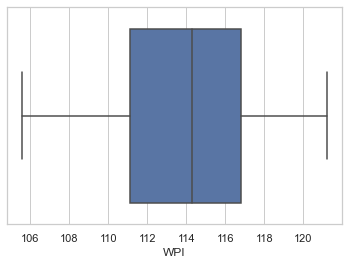

In [36]:
targetVariable  = 'WPI'
sns.set(style="whitegrid")
ax = sns.boxplot(x=reshaped_df[targetVariable])
plt.show()

<AxesSubplot:ylabel='Frequency'>

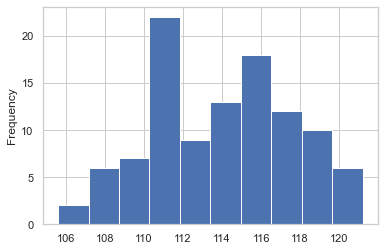

In [37]:
product_data[targetVariable].plot(kind ="hist")

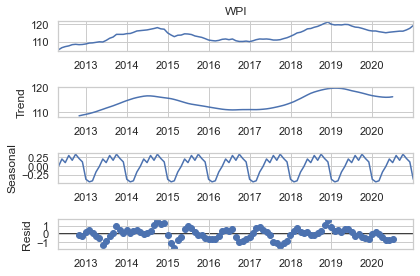

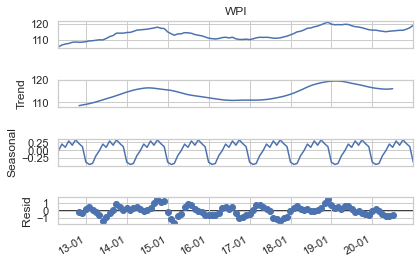

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.dates import DateFormatter
from matplotlib import dates as mpld
product_data = reshaped_df
result_add = seasonal_decompose(product_data['WPI'],model='additive',period=12)
result_add.plot()
plt.gcf().autofmt_xdate()
date_format = mpld.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter(date_format)

In [39]:
#REsmapling the data
product_data_year = product_data.resample('M').agg(
        {
            targetVariable:'mean'
            
        })
product_data_year.head(2)
product_data_year.tail(2)

,WPI
TimeSeries,
2012-04-30,105.6000
2012-05-31,106.8000


,WPI
TimeSeries,
2020-11-30,117.7000
2020-12-31,119.3000


In [41]:
model_building_df = product_data
model_building_df['TimeSeries'] = model_building_df.index
#Model building
# Choose prediction step
prediction_size = 2  #Test Data Size
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(model_building_df['TimeSeries'])
train_dataset['y']=model_building_df[targetVariable]
#train_dataset['AvgtempC'] = product_data['AvgtempC']
#train_dataset['PrecipMM'] = product_data['PrecipMM']

train_df = train_dataset.iloc[:len(train_dataset)-prediction_size,:]
test_df = train_dataset.iloc[len(train_dataset)-prediction_size:,:]

train_df.tail(2)
test_df.tail(10)

,ds,y
TimeSeries,,
2020-09-30,2020-09-30,116.1000
2020-10-31,2020-10-31,116.8000


,ds,y
TimeSeries,,
2020-11-30,2020-11-30,117.7000
2020-12-31,2020-12-31,119.3000


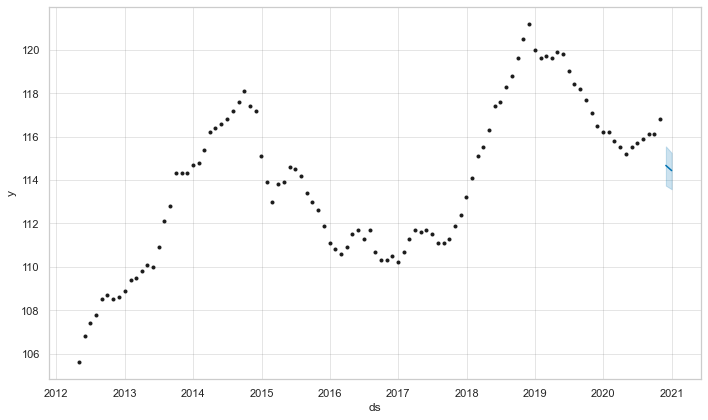

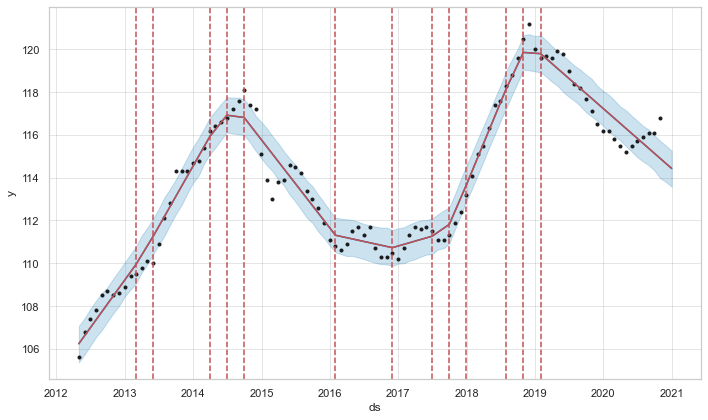

In [42]:
pro_regressor= Prophet(growth='linear',daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False,
                      seasonality_mode='multiplicative',
                       changepoint_prior_scale=0.05,
                      )
#pro_regressor.add_country_holidays(country_name='IN')
#pro_regressor.add_regressor('AvgtempC')
#pro_regressor.add_regressor('PrecipMM')
pro_regressor.fit(train_df)
future_data = pro_regressor.make_future_dataframe(periods=prediction_size,freq='M')#-------------------- Chooose Frequency
#future_data['AvgtempC']=train_dataset['AvgtempC']
#future_data['PrecipMM']=train_dataset['PrecipMM']
#future_data['AvgtempC'] = future_data['AvgtempC'].replace(np.nan,25)
#future_data['PrecipMM'] = future_data['PrecipMM'].replace(np.nan,0)
forecast_data = pro_regressor.predict(test_df)
fig = pro_regressor.plot(forecast_data);

forecaste = pro_regressor.predict(future_data)
fig = pro_regressor.plot(forecaste);
a = add_changepoints_to_plot(fig.gca(), pro_regressor, forecaste)


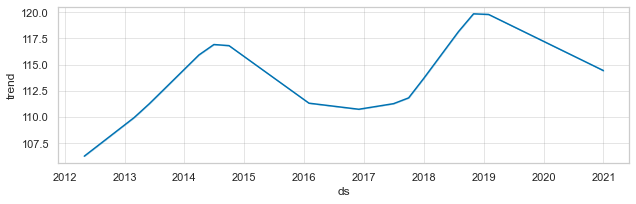

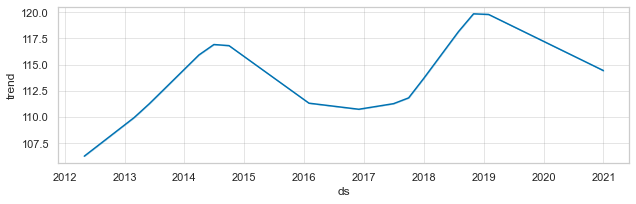

In [43]:
#Plotting the forecaste component
pro_regressor.plot_components(forecaste)

In [44]:
forecaste.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
90,2019-10-31,117.7053,116.8561,118.6194,117.7053,117.7053,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,117.7053
91,2019-11-30,117.4754,116.6609,118.2912,117.4754,117.4754,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,117.4754
92,2019-12-31,117.2378,116.4342,118.0619,117.2378,117.2378,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,117.2378
93,2020-01-31,117.0002,116.1268,117.8685,117.0002,117.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,117.0002
94,2020-02-29,116.7780,115.9559,117.6231,116.7780,116.7780,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,116.7780
95,2020-03-31,116.5404,115.7496,117.3276,116.5404,116.5404,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,116.5404
96,2020-04-30,116.3105,115.4756,117.1571,116.3105,116.3105,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,116.3105
97,2020-05-31,116.0729,115.2291,116.8999,116.0729,116.0729,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,116.0729
98,2020-06-30,115.8429,114.9645,116.6658,115.8429,115.8429,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,115.8429
99,2020-07-31,115.6053,114.7589,116.4203,115.6053,115.6053,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,115.6053


In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual = list(test_df['y'])
y_predicted = list(forecast_data['yhat'])
rms = sqrt(mean_squared_error(y_actual, y_predicted))
print("Root mean square : ",rms)
for i in range(0,len(y_actual)):
    a=y_actual[i]
    b=y_predicted[i]
    c = abs(a-b)
    #print(c)
    print('Accuracy for stemp ',i+1,' is ',abs(100-((c/a)*100)))

Root mean square :  4.053986536871945
Accuracy for stemp  1  is  97.42591342567013
Accuracy for stemp  2  is  95.92012398835786


In [209]:
forecast_data.tail(10)
test_df.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-31,116.2566,112.9135,119.6764,116.2559,116.2571,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,116.2566
1,2020-12-31,117.1089,113.6741,120.5665,117.1061,117.1112,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,117.1089


,ds,y
TimeSeries,,
2019-12-31,2019-12-31,118.4750
2020-12-31,2020-12-31,116.3167


In [46]:
def make_comparison_dataframe(historical, forecaste):
        return forecaste.set_index('ds')[['yhat','yhat_lower','yhat_upper']].join(historical.set_index('ds'))

In [47]:
forecaste_horizon=10
future_data = pro_regressor.make_future_dataframe(periods=forecaste_horizon,freq='M')
forecast_data = pro_regressor.predict(future_data)
cmp_df = make_comparison_dataframe(train_dataset,forecast_data)
cmp_df['TimeSeries'] =  cmp_df.index
cmp_df['TimeSeries']  = cmp_df['TimeSeries'].dt.strftime('%Y-%m-%d')   
#fromDate='2020-12-31'
#cmp_df = cmp_df.loc[fromDate:]
dates = list(cmp_df['TimeSeries'] )
cmp_df['y'] = cmp_df['y'].replace(np.nan,0)
actual = list(cmp_df['y'].astype(int))
forecasted = list(cmp_df['yhat'].astype(int))
cmp_df.index=cmp_df['TimeSeries']
#cmp_df.drop(['ds'],inplace=True, axis = 1)
cmp_df.head(15)

,yhat,yhat_lower,yhat_upper,y,TimeSeries
TimeSeries,,,,,
2012-04-30,106.2415,105.3758,107.0387,105.6000,2012-04-30
2012-05-31,106.6176,105.7837,107.4488,106.8000,2012-05-31
2012-06-30,106.9816,106.1536,107.8249,107.4000,2012-06-30
2012-07-31,107.3578,106.5146,108.2118,107.8000,2012-07-31
2012-08-31,107.7340,106.8887,108.6160,108.5000,2012-08-31
2012-09-30,108.0980,107.2564,108.9552,108.7000,2012-09-30
2012-10-31,108.4742,107.6257,109.3357,108.5000,2012-10-31
2012-11-30,108.8382,107.9891,109.6413,108.6000,2012-11-30
2012-12-31,109.2144,108.3664,110.1268,108.9000,2012-12-31


In [ ]:
add_dict={}
add_dict['Name of Commodity']=product_forecast_commodity
for i,d in cmp_df.iterrows():
    add_dict[d['TimeSeries']]=d['yhat']
    print(d['TimeSeries'])
forecasting_record = forecasting_record.append(add_dict, ignore_index=True)

In [ ]:
forecasting_record = pd.DataFrame()

# Holt's Winter Method

In [158]:
#REsmapling the data
product_data_year = product_data.resample('Y').agg(
        {
            targetVariable:'mean'
            
        })

In [159]:
product_data_year.tail(5)

,WPI
TimeSeries,
2016-12-31,110.8750
2017-12-31,111.6250
2018-12-31,117.8667
2019-12-31,118.4750
2020-12-31,116.3167


In [167]:
product_data_model = product_data_year
product_data_model['TimeSeries'] = product_data_model.index
prediction_size = 2  #Test Data Size
#train_df = train_dataset.iloc[:len(train_dataset)-prediction_size,:]
#test_df = train_dataset.iloc[len(train_dataset)-prediction_size:,:]
train_dataset= pd.DataFrame()
train_dataset['TimeSeries'] = pd.to_datetime(product_data_model['TimeSeries'])
train_dataset[targetVariable]=product_data_model[targetVariable]
train_dataset.index = train_dataset['TimeSeries']


train = product_data_model.iloc[:len(train_dataset)-prediction_size,:] 
test = product_data_model.iloc[len(train_dataset)-prediction_size:,:]

In [168]:
train.tail(5)
test.tail(5)
len(train)
len(test)

,WPI,TimeSeries
TimeSeries,,
2014-12-31,116.5667,2014-12-31
2015-12-31,113.3250,2015-12-31
2016-12-31,110.8750,2016-12-31
2017-12-31,111.6250,2017-12-31
2018-12-31,117.8667,2018-12-31


,WPI,TimeSeries
TimeSeries,,
2019-12-31,118.4750,2019-12-31
2020-12-31,116.3167,2020-12-31


7

2

d:\programefile\anaconda\envs\analyst\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'Sales Forecasting')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'WPI')

<Figure size 864x360 with 0 Axes>

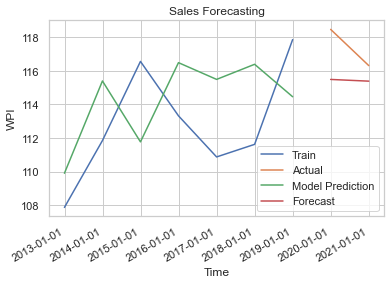

<Figure size 864x360 with 0 Axes>

2019-12-31   115.4932
2020-12-31   115.3902
Freq: A-DEC, dtype: float64

In [170]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing #Choose Seasonal period here------------------------------------
model = ExponentialSmoothing(train[targetVariable],trend='add',seasonal='add',seasonal_periods=2,damped=True).fit(damping_slope=0.8)
plt.plot(train.index,train[targetVariable],label="Train")
plt.plot(test.index,test[targetVariable],label="Actual")

#Past prediction from the model
prediction = model.predict(start=train.iloc[:,1].index[0],end=train.iloc[:,1].index[-1])
model_prediction = {"Modelprediction":prediction}
model_prediction = pd.DataFrame(model_prediction)
model_prediction['TimeSeries'] = model_prediction.index
plt.plot(model_prediction.index,model_prediction['Modelprediction'],label="Model Predict")


# Create a forecast
plt.plot(model.forecast(prediction_size),label="Forecast")
plt.legend(['Train','Actual','Model Prediction','Forecast'])
plt.gcf().autofmt_xdate()
date_format = mpld.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Sales Forecasting")
plt.xlabel("Time")
plt.ylabel(targetVariable)
plt.figure(figsize=(12,5))
plt.show()
forecast_data = model.forecast(prediction_size)
forecast_data



#Append the forecast and the model predict.
#model.forecast uses the future number of observation from the left training data point
#model.predict uses the start and end index in date formate to predict the value basis on the equation.

In [171]:
forecast_data = model.forecast(prediction_size)  # --------------------------------- #Replace with the forecast horizon
forecast_data_df = {"Prediction":forecast_data}
forecast_data_df = pd.DataFrame(forecast_data_df)
forecast_data_df['TimeSeries'] = forecast_data_df.index
forecast_data_df.head(5)

,Prediction,TimeSeries
2019-12-31,115.4932,2019-12-31
2020-12-31,115.3902,2020-12-31


In [172]:
test

,WPI,TimeSeries
TimeSeries,,
2019-12-31,118.4750,2019-12-31
2020-12-31,116.3167,2020-12-31


In [173]:
mean_squared_error(test[targetVariable], result_forecast[targetVariable]) 

NameError: name 'result_forecast' is not defined

In [ ]:
pre_result.tail(5)
pre_result.index
train_test.tail(5)
train_test.index
def make_comparison_dataframe(historical, forecaste):
    historical.index = historical['TimeSeries']
    return forecaste.set_index('TimeSeries')[['Prediction']].join(historical.set_index('TimeSeries'))
cmp_df = make_comparison_dataframe(train_test,pre_result)
cmp_df.head(10)